In [1]:
import sys
import os 
sys.path.append(os.path.abspath('..'))

In [2]:
from environments.grid_world import GridworldEnv
from algorithms.montecarlo_off_policy_policy_evaluation import montecarlo_off_policy_policy_evaluation, generate_behaviour_policy
from algorithms.helpers import initialize_policy, generate_state_action_keys
import matplotlib.pyplot as plt
import numpy as np

Initial state (row,col): (0, 0)
Initial state index: 0
Goal: [(3, 3), (0, 0)] Goal index: [15, 0]


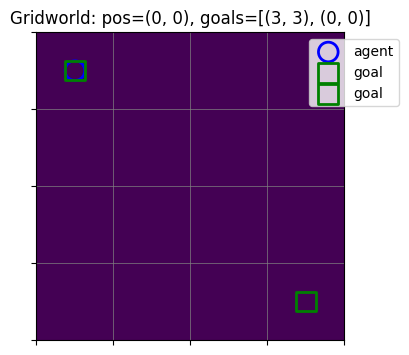

<Axes: title={'center': 'Gridworld: pos=(0, 0), goals=[(3, 3), (0, 0)]'}>

In [3]:
# create env and render initial state
env = GridworldEnv(width=4, height=4, start=(0,0), goals=[(3,3), (0, 0)],
                   step_reward=-1, goal_reward=-1, seed=123)

# Reset and print a few pieces of information
init_state = env.reset()
print("Initial state (row,col):", init_state)
print("Initial state index:", env.state_to_index(init_state))
print("Goal:", env.goals, "Goal index:", [env.state_to_index(goal) for goal in env.goals])

# Render to inspect visually
env.render()

In [4]:
target_policy = initialize_policy(env, use_good_policy=True)
#target_policy = generate_behaviour_policy(env)
Q_s_a = montecarlo_off_policy_policy_evaluation(env, target_policy, is_target_policy_stochastic=False)

In [5]:
for i in range(4):
    print(Q_s_a[(1, i)], env.VERBOSE_ACTIONS[i])

-1.947898581560968 UP
-2.8445941380113178 RIGHT
-2.850434946901027 DOWN
-1.0 LEFT


In [6]:

def plot_q_heatmaps(env, Q_s_a):
    """
    Plot Q(s,a) heatmaps for each action in the environment.
    Ensures consistent color scaling and removes the colorbar legend from overlaying any plot.
    """
    grid_shape = (env.height, env.width)
    n_actions = len(env.ACTIONS)

    # Precompute all states and valid (non-goal) indices
    all_states = [env.index_to_state(i) for i in range(env.width * env.height)]
    valid_indices = [i for i, s in enumerate(all_states) if s not in env.goals]

    # Build Q-maps for each action efficiently
    q_maps = []
    for action in env.ACTIONS:
        q_map = np.full(grid_shape, np.nan)
        for i in valid_indices:
            s = all_states[i]
            q_map[s] = Q_s_a.get(generate_state_action_keys(i, action), 0.0)
        q_maps.append(q_map)

    # Compute global min/max for consistent color scaling
    q_min = np.nanmin(q_maps)
    q_max = np.nanmax(q_maps)

    # Setup figure
    fig, axes = plt.subplots(1, n_actions, figsize=(5 * n_actions, 5), constrained_layout=True)
    if n_actions == 1:
        axes = [axes]

    # Plot each action's Q-map
    for ax, action, q_map in zip(axes, env.ACTIONS, q_maps):
        im = ax.imshow(q_map, cmap="viridis", origin="upper", vmin=q_min, vmax=q_max)
        ax.set_title(f"Q(s,a) for Action:'{env.VERBOSE_ACTIONS[action]}'", fontsize=12)
        ax.set_xticks(range(env.width))
        ax.set_yticks(range(env.height))
        ax.set_xlabel("X")
        ax.set_ylabel("Y")

    # Add one colorbar that doesn’t overlap with any plot
    cbar = fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.03, pad=0.05)
    cbar.set_label("Expected Return", fontsize=12)

    fig.suptitle("Monte Carlo Off-Policy Evaluation — Q(s,a) per Action", fontsize=14)
    plt.show()


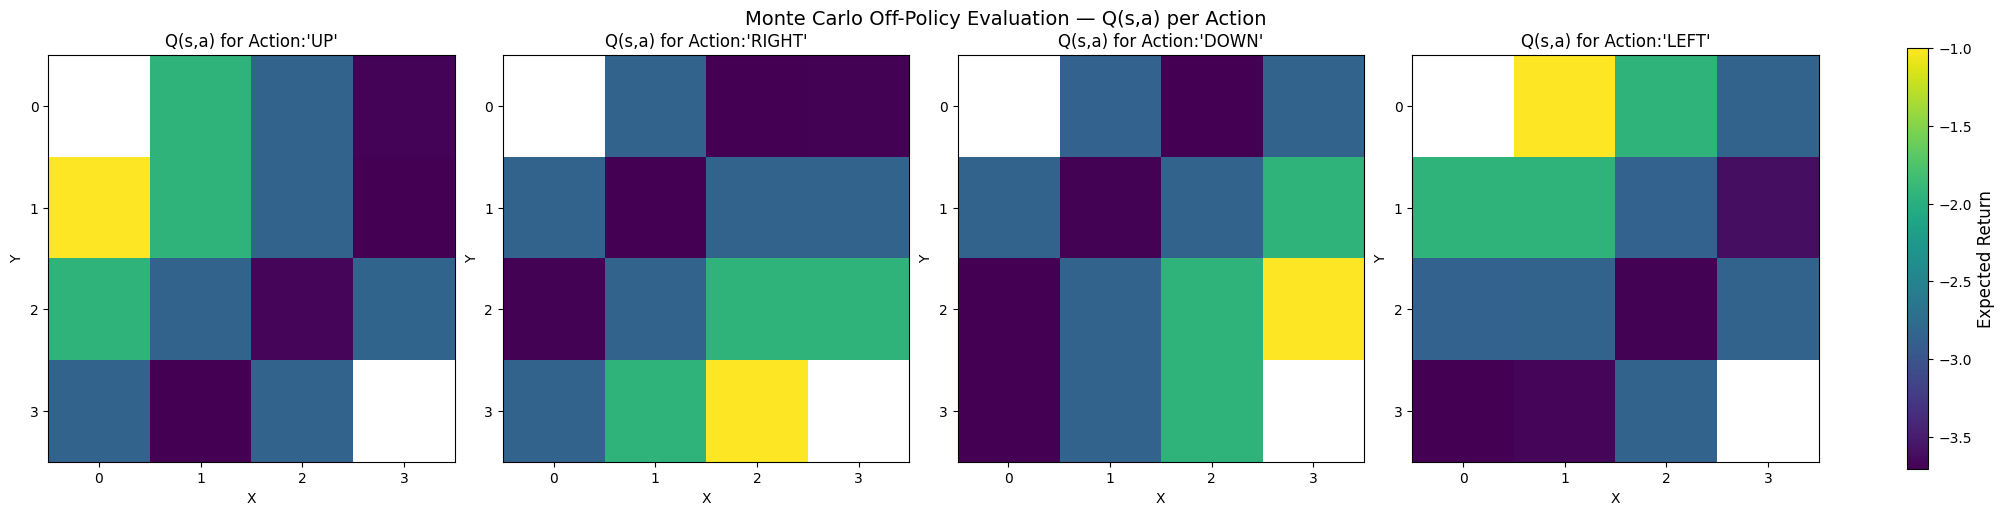

In [7]:
plot_q_heatmaps(env, Q_s_a)